In [2]:
from google.colab import drive
import os
if 'google.colab' in str(get_ipython()):
  drive.mount('/content/gdrive')
  os.chdir('/content/gdrive/MyDrive/Benchmarking-Distributional-Alignment-of-Small-Language-Models')

Mounted at /content/gdrive


/tmp/wuzhengx/ipykernel_171077/3989995253.py:23: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


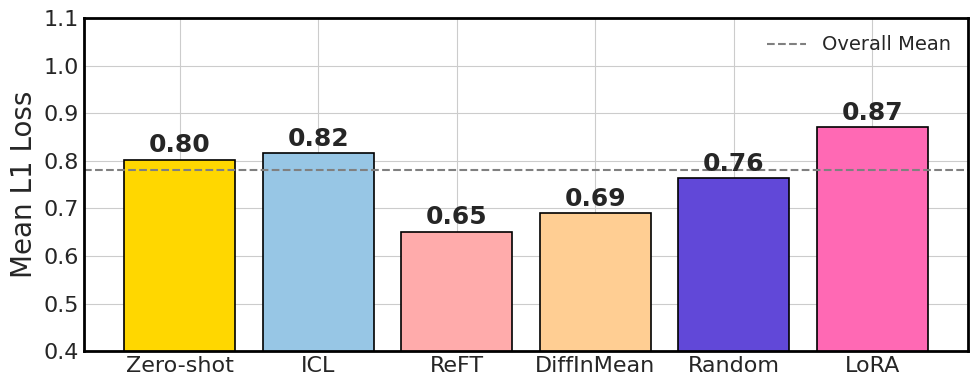

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import json
import matplotlib as mpl

# Load data
json_files = [
    'distance_zs.json', 'distance_icl.json',
    'distance_reft.json', 'distance_reps.json', 'distance_random.json', 'distance_lora.json'
]
data = []
for file in json_files:
    with open(file, 'r') as f:
        data.append(json.load(f))

# Compute means
means = [np.mean(d) for d in data]

# Define color palette provided
color_palette = ['#FFD700', '#97C6E5', '#FFABAB', '#FFCE93', '#6148D8', '#FF69B4']  # Added a 6th color

# Set plot style and font
plt.style.use('seaborn-whitegrid')
mpl.rcParams.update({
    'font.size': 14,
    'axes.labelsize': 18,
    'axes.titlesize': 18,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'legend.fontsize': 14,
})

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 4))

# Positions for bars
x_positions = np.arange(len(json_files)) + 1

# Plot bar chart without error bars
bars = ax.bar(
    x_positions, means, color=color_palette,
    edgecolor='black', linewidth=1.2
)

# Annotate mean values
for i, mean in enumerate(means, start=1):
    ax.text(
        i, mean + 0.005, f'{mean:.2f}', ha='center', va='bottom',
        fontsize=18, fontweight='bold'
    )

# Overall mean line
overall_mean = np.mean([item for sublist in data for item in sublist])
overall_line = ax.axhline(overall_mean, color='grey', linestyle='--', linewidth=1.5)

# Move overall mean annotation into legend
ax.legend([overall_line], ['Overall Mean'], loc='upper right')

# Set labels with larger font sizes
ax.set_ylabel('Mean L1 Loss', fontsize=20)

# Set x-ticks
ax.set_xticks(x_positions)
ax.set_xticklabels(
    ["Zero-shot", "ICL", "ReFT", "DiffInMean", "Random", "LoRA"]
)

# Adjust y-limits to focus on mean differences
# ymin = min(means) - 0.05 * (max(means) - min(means))
# ymax = max(means) + 0.10 * (max(means) - min(means))
ax.set_ylim(0.4, 1.1)

# Remove title
# ax.set_title('Comparison of Steering Methods', fontsize=18, pad=20)

C, W, L, T = "black", 2, 2, 2 # <- adjust here
#Color, Width, Length, Tickness --------------
list_of_spines = ["left", "right", "top", "bottom"]
for sp in list_of_spines:
    ax.spines[sp].set_linewidth(T)
    ax.spines[sp].set_color(C)

# Tight layout
plt.tight_layout()

# Show plot
fig.savefig('result.pdf', format='pdf', dpi=300)